# Credit Card Fraud Prediction using Tensorflow Neural Network.

**About the dataset.**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [110]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

In [138]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [139]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
data.shape

(284807, 31)

In [141]:
df= data.rename(columns={'V1': 'Feature1','V2': 'Feature2','V3': 'Feature3','V4': 'Feature4','V5': 'Feature5','V6': 'Feature6','V7': 'Feature7','V8': 'Feature8','V9': 'Feature9','V10': 'Feature10'})

In [142]:
df.describe()

,Time,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Reducing the number of features

### To clean and organise the data. The no of features are reduced.

In [143]:
df.drop(['V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],inplace = True, axis=1)

In [144]:
df.describe()

,Time,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,25691.160000,1.000000


### **Transaction distribution.**

In [151]:
Total_transaction = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraudulent_percentage = round(fraudulent*100/Total_transaction, 2)
print('Total number of transactions: ' + str(Total_transaction))
print('Number of normal transactions: ' + str(normal))
print('Number of fraudulent transactions: ' + str(fraudulent))
print('Percentage of fraudulent transactions: ' + str(fraudulent_percentage))

Total number of transactions: 284807
Number of normal transactions: 284315
Number of fraudulent transactions: 492
Percentage of fraudulent transactions: 0.17


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       284807 non-null  float64
 1   Feature1   284807 non-null  float64
 2   Feature2   284807 non-null  float64
 3   Feature3   284807 non-null  float64
 4   Feature4   284807 non-null  float64
 5   Feature5   284807 non-null  float64
 6   Feature6   284807 non-null  float64
 7   Feature7   284807 non-null  float64
 8   Feature8   284807 non-null  float64
 9   Feature9   284807 non-null  float64
 10  Feature10  284807 non-null  float64
 11  Amount     284807 non-null  float64
 12  Class      284807 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 28.2 MB


There is no null values in the dataset.

**Normal and fraudulent distributions for the 'Time' feature will be implemented below**

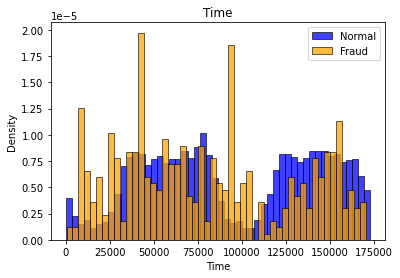

In [155]:
ax = plt.subplot()
sns.histplot(df['Time'][df.Class==0], bins=50, color="blue",stat="density")
sns.histplot(df['Time'][df.Class==1], bins=50, color="orange",stat="density")
plt.legend(["Normal", "Fraud"])
ax.set_title('Time')
             
plt.show()

**The above plot shows at what time Normal,Fradulent transactions took place.**

In [156]:
df.drop(['Time'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.shape 

(275663, 12)

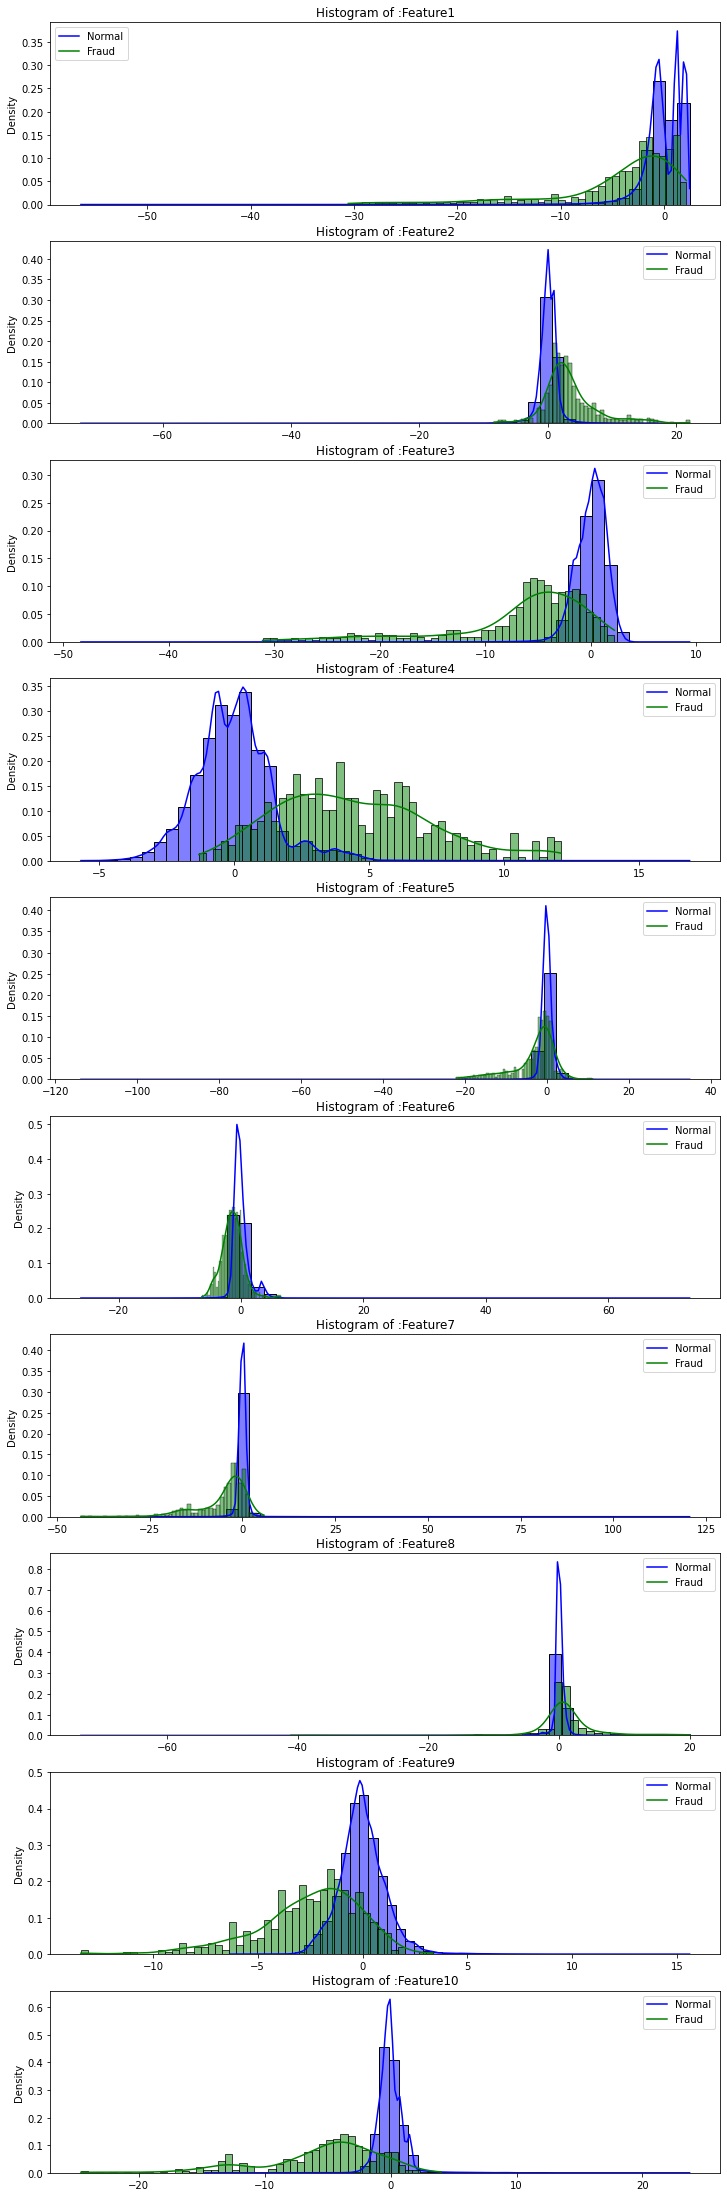

In [181]:
v_features = df.iloc[:, 0:10].columns

plt.figure(figsize=(12, 29*4))
gs = gridspec.GridSpec(29, 1)

for i, col in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[col][df.Class == 0], bins = 50, color="blue", stat="density", kde=True)
    sns.histplot(df[col][df.Class == 1], bins = 50, color="green", stat="density", kde=True)
    plt.legend(["Normal","Fraud"])
    ax.set_xlabel('')
    ax.set_title('Histogram of :' + str(col))

plt.show()

### **Cleaning and Organising Data**

In [159]:
           
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

## Splitting the dataset for train and test set

The Dataset is split for train and test set

In [163]:
X = df.drop(['Class'], axis=1).values
Y = df['Class'].values

input_node = X.shape[1]

X = X.astype('float32')
Y = Y.astype('float32').reshape((-1,1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

## Implementing TensorFlow Neural Network

We will use 4 layers with
* LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.

In [164]:
multiplier = 0.5
hidden_nodes1 = 25
hidden_nodes2 = round(hidden_nodes1*multiplier)
hidden_nodes3 = round(hidden_nodes2*multiplier)

In [165]:
def initialize_parameter():
    zero_initializer = tf.zeros_initializer()
    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.15)

  
    W1 = tf.Variable(initializer([hidden_nodes1, input_node], dtype=tf.float32))
    b1 = tf.Variable(zero_initializer([hidden_nodes1, 1], dtype=tf.float32))

    
    W2 = tf.Variable(initializer([hidden_nodes2, hidden_nodes1], dtype=tf.float32))
    b2 = tf.Variable(zero_initializer([hidden_nodes2, 1], dtype=tf.float32))
                 
    
    W3 = tf.Variable(initializer([hidden_nodes3, hidden_nodes2], dtype=tf.float32))
    b3 = tf.Variable(zero_initializer([hidden_nodes3, 1], dtype=tf.float32))
                 

    W4 = tf.Variable(initializer([1, hidden_nodes3], dtype = tf.float32))
    b4 = tf.Variable(zero_initializer([1], dtype=tf.float32))
    
    return W1, b1, W2, b2, W3, b3, W4, b4

def forward_propagation(X, W1, b1, W2, b2, W3, b3, W4, b4):
    tf.cast(X, tf.float32)
    z1 = tf.math.add(tf.linalg.matmul(W1,X),b1)
    y1 = tf.keras.activations.relu(z1)
    z2 = tf.math.add(tf.linalg.matmul(W2,y1),b2)
    y2 = tf.keras.activations.relu(z2)
    z3 = tf.math.add(tf.linalg.matmul(W3,y2),b3)
    y3 = tf.keras.activations.relu(z3)
    z4 = tf.math.add(tf.linalg.matmul(W4,y3),b4)
    y4 = tf.keras.activations.sigmoid(z4)
    
    return y4

### Setting Hyperparameters.

In [166]:
learning_rate = 0.0005
batch_size = 2048
num_epoch = 10

n_train = Y_train.shape[0]

### Computing cost function.

In [167]:
def compute_cost(y4, Y):
    
    logits = tf.transpose(y4)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

Performing Backpropagation and Using optimizer

In [168]:
x_train = tf.data.Dataset.from_tensor_slices(X_train)
y_train = tf.data.Dataset.from_tensor_slices(Y_train)
x_test = tf.data.Dataset.from_tensor_slices(X_test)
y_test = tf.data.Dataset.from_tensor_slices(Y_test)

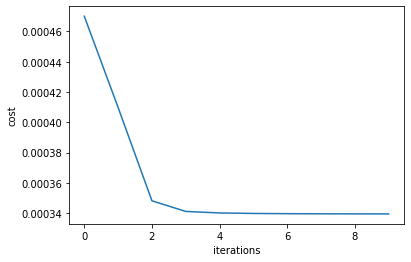

In [169]:
dataset = tf.data.Dataset.zip((x_train, y_train))
test_dataset = tf.data.Dataset.zip((x_test, y_test))

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

test_accuracy = tf.keras.metrics.CategoricalAccuracy()
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

minibatches = dataset.batch(batch_size).prefetch(8)
test_minibatches = test_dataset.batch(batch_size).prefetch(8)

costs = []
train_acc = []
test_acc = []

W1, b1, W2, b2, W3, b3, W4, b4 = initialize_parameter()
    
for epoch in range(num_epoch):
        
    epoch_cost = 0.
    train_accuracy.reset_states()
        
    for (minibatch_X, minibatch_Y) in minibatches:
        with tf.GradientTape() as tape:
            y4 = forward_propagation(tf.transpose(minibatch_X), W1, b1, W2, b2, W3, b3, W4, b4)
            tf.shape(y4)
            tf.shape(minibatch_Y)
            minibatch_cost = compute_cost(y4, tf.transpose(minibatch_Y))
                
        train_accuracy.update_state(minibatch_Y, y4)
        trainable_variables = [W1, b1, W2, b2, W3, b3, W4, b4]
        grads = tape.gradient(minibatch_cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
        epoch_cost += minibatch_cost
            
    epoch_cost /= n_train
    costs.append(epoch_cost)
    train_acc.append(train_accuracy.result())
    test_acc.append(test_accuracy.result())
    test_accuracy.reset_states()
                    
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

### *Importing Necessary Modules and Packages.*

In [170]:
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

* * ### *Decision Tree*

In [171]:
DT = DecisionTreeClassifier(max_depth=4, criterion='entropy')
DT.fit(X_train, Y_train)
DT_yhat = DT.predict(X_test)

Let's check the accuracy of the decision tree model.

In [173]:
print('Accuracy score :{}'.format(accuracy_score(Y_test, DT_yhat)))
print('F1 score :{}'.format(f1_score(Y_test, DT_yhat)))

Accuracy score of the Decision Tree Model is 0.9989842743910181
F1 score of the Decision Tree Model is 0.7113402061855669


In [174]:
confusion_matrix(Y_test, DT_yhat, labels=[0,1])

array([[55008,    23],
       [   33,    69]])

Here we have 55015 true positive (normal classified as normal) and 16 false positives (fraud classified as normal). Out of 28 + 74 = 102 real frauds, we missed about 16% of fraudulent transactions as fraudulent using the Decision Tree model.


* ### *K-Nearest Neighbors*

In [175]:
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(X_train, Y_train)
KNN_yhat = KNN.predict(X_test)

In [180]:
print('Accuracy score :{}'.format(accuracy_score(Y_test, KNN_yhat)))
print('F1 score: {}'.format(f1_score(Y_test, KNN_yhat)))
confusion_matrix(Y_test, KNN_yhat, labels = [0,1])

Accuracy score :0.9991656539640505
F1 score: 0.7444444444444445


array([[55020,    11],
       [   35,    67]])

* ### *Support Vector Machines*

In [177]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_yhat = svm.predict(X_test)

In [179]:
print('Accuracy score:{}'.format(accuracy_score(Y_test, svm_yhat)))
print('F1 score: {}'.format(f1_score(Y_test, svm_yhat)))
confusion_matrix(Y_test, svm_yhat, labels=[0,1])

Accuracy score:0.9992019298786571
F1 score: 0.7471264367816093


array([[55024,     7],
       [   37,    65]])